## Detecting Loops in Linked Lists
In this notebook, you'll implement a function that detects if a loop exists in a linked list. The way we'll do this is by having two pointers, called "runners", moving through the list at different rates. Typically we have a "slow" runner which moves at one node per step and a "fast" runner that moves at two nodes per step.

If a loop exists in the list, the fast runner will eventually move behind the slow runner as it moves to the beginning of the loop. Eventually it will catch up to the slow runner and both runners will be pointing to the same node at the same time. If this happens then you know there is a loop in the linked list. Below is an example where we have a slow runner (the green arrow) and a fast runner (the red arrow).

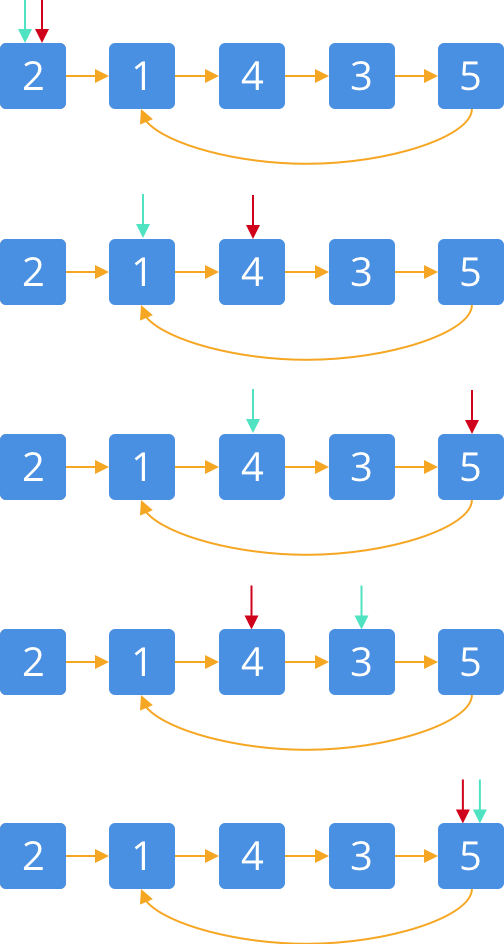

In [1]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None
        
class LinkedList:
    def __init__(self, init_list=None):
        self.head = None
        if init_list:
            for value in init_list:
                self.append(value)
        
    def append(self, value):
        if self.head is None:
            self.head = Node(value)
            return
        
        # Move to the tail (the last node)
        node = self.head
        while node.next:
            node = node.next
        
        node.next = Node(value)
        return

In [3]:
list_with_loop = LinkedList([2, -1, 3, 0, 5])

# Creating a loop where the last node points back to the second node
loop_start = list_with_loop.head.next

node = list_with_loop.head
while node.next: 
    node = node.next   
node.next = loop_start

In [2]:
# Solution

def iscircular(linked_list):
    """
    Determine wether the Linked List is circular or not

    Args:
       linked_list(obj): Linked List to be checked
    Returns:
       bool: Return True if the linked list is circular, return False otherwise
    """

    if linked_list.head is None:
        return False
    
    slow = linked_list.head
    fast = linked_list.head
    
    while fast and fast.next:
        # slow pointer moves one node
        slow = slow.next
        # fast pointer moves two nodes
        fast = fast.next.next
        
        if slow == fast:
            return True
    
    # If we get to a node where fast doesn't have a next node or doesn't exist itself, 
    # the list has an end and isn't circular
    return False

In [4]:
small_loop = LinkedList([0])
small_loop.head.next = small_loop.head
print ("Pass" if iscircular(list_with_loop) else "Fail")
print ("Pass" if not iscircular(LinkedList([-4, 7, 2, 5, -1])) else "Fail")
print ("Pass" if not iscircular(LinkedList([1])) else "Fail")
print ("Pass" if iscircular(small_loop) else "Fail")
print ("Pass" if not iscircular(LinkedList([])) else "Fail")

Pass
Pass
Pass
Pass
Pass
